<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import os
# os.chdir('D:/Karir/IBM/Data Science Certification/Course 8/Submission')

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-12-27 06:02:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2020-12-27 06:02:52 (1.03 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [39]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [40]:
df.shape

(346, 10)

In [41]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [42]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

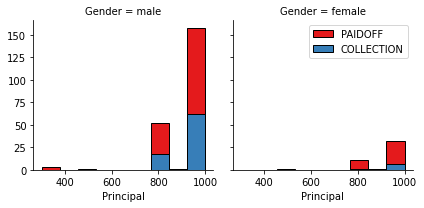

In [43]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

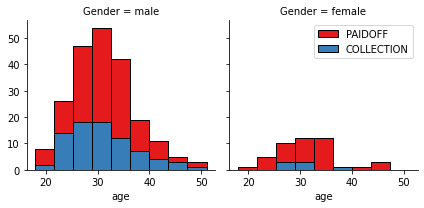

In [44]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

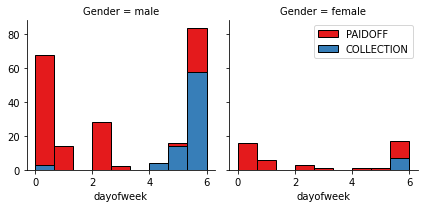

In [45]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [46]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [47]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [48]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [49]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [50]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [51]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [52]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [57]:
y = df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [58]:
X= preprocessing.StandardScaler().fit(X).transform(X)
# X[0:5]

In [59]:
X_train,y_train = X,y

# Classification

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [60]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
#from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
trainscore = {}

In [61]:
bestScore=0.0
accList=[]

for k in range(2,20):
    
    knn_mod = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    # using 10 fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(knn_mod, X, y, cv=10)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_knn=knn_mod
        bestK=k
        
print("Best K is ",bestK," with cross validation accuracy is",bestScore)
knn_mod=best_knn

Best K is  7  with cross validation accuracy is 0.7467226890756302


In [62]:
knn_mod.fit(X_train,y_train)
y_predknn = knn_mod.predict(X_train)
trainscore['KNN_jaccard'] = jaccard_similarity_score(y_train,y_predknn)*100
trainscore['KNN_f1_score'] = f1_score(y_train,y_predknn, average='weighted')*100
trainscore

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


{'KNN_f1_score': 79.55764876306203, 'KNN_jaccard': 80.92485549132948}

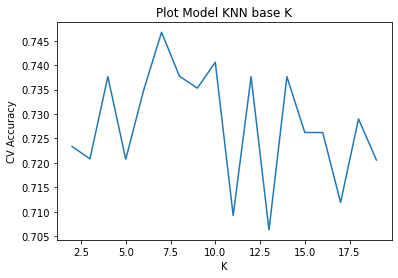

In [63]:
plt.plot(range(2,20),accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.title('Plot Model KNN base K')
plt.show()

# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
dc_mod = DecisionTreeClassifier()
dc_mod = dc_mod.fit(X_train, y_train)

y_pred_dc=dc_mod.predict(X_train)

trainscore['DC_Tree_jaccard'] = jaccard_similarity_score(y_train,y_pred_dc)*100
trainscore['DC_Treef1_score'] = f1_score(y_train,y_pred_dc, average='weighted')*100
trainscore

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


{'DC_Tree_jaccard': 89.30635838150289,
 'DC_Treef1_score': 88.7074869590869,
 'KNN_f1_score': 79.55764876306203,
 'KNN_jaccard': 80.92485549132948}

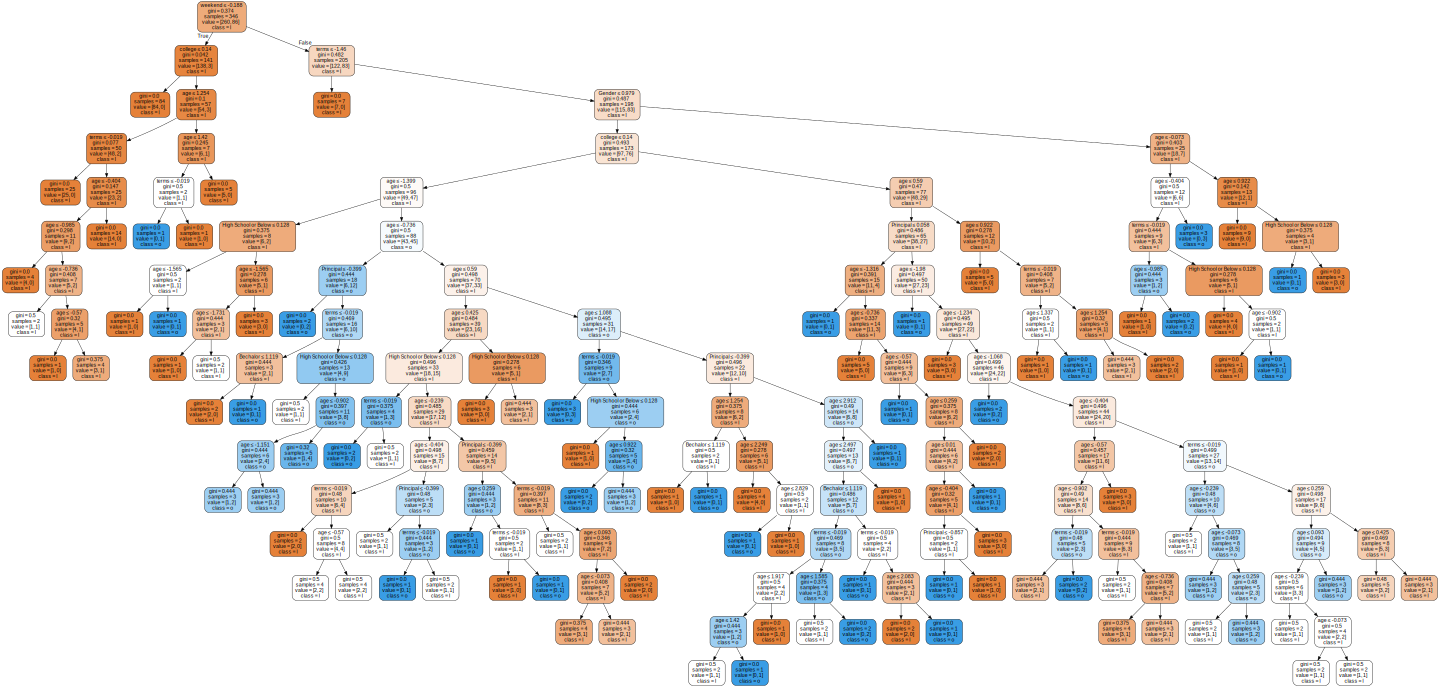

In [65]:
import graphviz
import pydotplus

from sklearn import tree

d = tree.export_graphviz(dc_mod, feature_names = [*Feature.columns],
                         class_names = 'loan_status',
                         filled = True, rounded = True,
                         special_characters = True)
graph = pydotplus.graph_from_dot_data(d)
graph.set_size('"20!"')
gra = graphviz.Source(graph.to_string())
gra

# Support Vector Machine

In [66]:
from sklearn import svm
svm_mod = svm.LinearSVC(random_state=7)
svm_mod.fit(X_train, y_train)  

y_pred=svm_mod.predict(X_train)
trainscore['SVM_jaccard'] = jaccard_similarity_score(y_train,y_pred)*100
trainscore['SVM_f1_score'] = f1_score(y_train,y_pred, average = 'weighted')*100
trainscore

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


{'DC_Tree_jaccard': 89.30635838150289,
 'DC_Treef1_score': 88.7074869590869,
 'KNN_f1_score': 79.55764876306203,
 'KNN_jaccard': 80.92485549132948,
 'SVM_f1_score': 64.41316913797436,
 'SVM_jaccard': 73.98843930635837}

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

Lr=LogisticRegression()
Lr.fit(X_train,y_train)
y_pred_lr=Lr.predict(X_train)
y_proba = Lr.predict_proba(X_train)


In [68]:
trainscore['LR_jaccard'] = jaccard_similarity_score(y_train, y_pred_lr)*100
trainscore['LR_f1_score']=f1_score(y_train, y_pred_lr, average='weighted')*100  
trainscore['LR_logLoss']=log_loss(y_train, y_proba)*100
trainscore

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


{'DC_Tree_jaccard': 89.30635838150289,
 'DC_Treef1_score': 88.7074869590869,
 'KNN_f1_score': 79.55764876306203,
 'KNN_jaccard': 80.92485549132948,
 'LR_f1_score': 69.33655063955966,
 'LR_jaccard': 75.43352601156069,
 'LR_logLoss': 43.344699042538444,
 'SVM_f1_score': 64.41316913797436,
 'SVM_jaccard': 73.98843930635837}

# Model Evaluation using Test set

In [69]:
import sklearn
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [70]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [71]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X = Feature

y = test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values

testy=y.astype(float)
testX= preprocessing.StandardScaler().fit_transform(X)

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Principal             54 non-null     int64
 1   terms                 54 non-null     int64
 2   age                   54 non-null     int64
 3   Gender                54 non-null     int64
 4   weekend               54 non-null     int64
 5   Bechalor              54 non-null     uint8
 6   High School or Below  54 non-null     uint8
 7   college               54 non-null     uint8
dtypes: int64(5), uint8(3)
memory usage: 2.4 KB


In [73]:
testscore = {}

In [74]:
trainscore

{'DC_Tree_jaccard': 89.30635838150289,
 'DC_Treef1_score': 88.7074869590869,
 'KNN_f1_score': 79.55764876306203,
 'KNN_jaccard': 80.92485549132948,
 'LR_f1_score': 69.33655063955966,
 'LR_jaccard': 75.43352601156069,
 'LR_logLoss': 43.344699042538444,
 'SVM_f1_score': 64.41316913797436,
 'SVM_jaccard': 73.98843930635837}

# KNN Test

In [76]:
knn_pred=knn_mod.predict(testX)
testscore['KNN_jaccard']=jaccard_similarity_score(testy, knn_pred)*100
testscore['KNN_f1_score']=f1_score(testy, knn_pred, average='weighted')*100
testscore

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


{'KNN_f1_score': 70.01989201477693, 'KNN_jaccard': 72.22222222222221}

# Decision Tree Test

In [78]:
tree_pred=dc_mod.predict(testX)
testscore['DC_Tree_jaccard']=jaccard_similarity_score(testy, tree_pred)*100
testscore['DC_Tree_f1_score']=f1_score(testy, tree_pred, average='weighted')*100
testscore

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


{'DC_Tree_f1_score': 71.05756358768406,
 'DC_Tree_jaccard': 72.22222222222221,
 'KNN_f1_score': 70.01989201477693,
 'KNN_jaccard': 72.22222222222221}

# SVM Test

In [100]:
svm_pred=svm_mod.predict(testX)
testscore['SVM-jaccard']=jaccard_similarity_score(testy, svm_pred)*100  
testscore['SVM-f1-score']=f1_score(testy, svm_pred, average='weighted')*100
testscore

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


{'DC_Tree_f1_score': 71.05756358768406,
 'DC_Tree_jaccard': 72.22222222222221,
 'KNN_f1_score': 70.01989201477693,
 'KNN_jaccard': 72.22222222222221,
 'LogReg-f1-score': 67.17642373556352,
 'LogReg-jaccard': 75.92592592592592,
 'LogReg-logLoss': 48.08081643472632,
 'SVM-f1-score': 63.04176516942475,
 'SVM-jaccard': 74.07407407407408}

# Linear Regression Test

In [274]:
log_pred=Lr.predict(testX)
log_pred

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF'], dtype=object)

In [98]:
log_preds=Lr.predict(testX)
log_probs=Lr.predict_proba(testX)

testscore['LogReg-jaccard']=jaccard_similarity_score(testy, log_preds)*100
testscore['LogReg-f1-score']=f1_score(testy, log_preds, average='weighted')*100  
testscore['LogReg-logLoss']=log_loss(testy, log_probs)*100

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [96]:
trainscore
ts = pd.DataFrame.from_dict(trainscore, orient='index').reset_index()
ts.columns = ['Algo_mat','score']
ts

,Algo_mat,score
0,KNN_jaccard,80.924855
1,KNN_f1_score,79.557649
2,DC_Tree_jaccard,89.306358
3,DC_Treef1_score,88.707487
4,SVM_jaccard,73.988439
5,SVM_f1_score,64.413169
6,LR_jaccard,75.433526
7,LR_f1_score,69.336551
8,LR_logLoss,43.344699


In [101]:
testscore
tes = pd.DataFrame.from_dict(testscore, orient='index').reset_index()
tes.columns = ['Algo_mat','score']
tes

,Algo_mat,score
0,KNN_jaccard,72.222222
1,KNN_f1_score,70.019892
2,DC_Tree_jaccard,72.222222
3,DC_Tree_f1_score,71.057564
4,SVM-jaccard,74.074074
5,SVM-f1-score,63.041765
6,LogReg-jaccard,75.925926
7,LogReg-f1-score,67.176424
8,LogReg-logLoss,48.080816


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 72.22       | 70.02        | NA      |
| Decision Tree      | 72.22       | 71.05        | NA      |
| SVM                | 74.07       | 63.04        | NA      |
| LogisticRegression | 75.92       | 67.17        | 48.08       |

From those classifier algorithm we found that stable is Decision Tree. But when we compare with trainscore there is an overfitting. because secore jaccard in decision tree train is 89.30 and in test score jaccard is 72.22. Same with f1 score. So, to make better we have to make split X_train test in training. may be it can be stable prediction.  

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>